# Web Mining and Applied NLP (44-620)

## Final Project: Article Summarizer

### Student Name: Trent Rueckert

### GitHub Repo: https://github.com/trentrueckert/article-summarizer-true

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

You should bring in code from previous assignments to help you answer the questions below.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

In [10]:
# Import dependencies

import spacy
from collections import Counter
from bs4 import BeautifulSoup
import requests
import pickle
import matplotlib.pyplot as plt
from textblob import TextBlob

## Question 1. 

Find on the internet an article or blog post about a topic that interests you and you are able to get the text for using the technologies we have applied in the course.  Get the html for the article and store it in a file (which you must submit with your project)

In [2]:
# URL of the article
url = 'https://theconversation.com/mlb-home-run-counts-are-rising-and-global-warming-is-playing-a-role-203226'

# Fetch the HTML content
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Get the HTML content from the response
    html_content = response.text
    
    # Create the filename for saving the HTML content
    filename = 'article_html.pkl'
    
    # Save the HTML content to a .pkl file using pickle
    with open(filename, 'wb') as f:
        pickle.dump(html_content, f)

    print(f"HTML content successfully saved to {filename}")
else:
    print(f"Failed to retrieve the article. HTTP Status code: {response.status_code}")

# Load the HTML content from the .pkl file
with open('article_html.pkl', 'rb') as f:
    loaded_html = pickle.load(f)

# Print the first 100 characters of the HTML content to verify it's loaded
print("\nLoaded HTML content (first 100 characters):")
print(loaded_html[:100])

HTML content successfully saved to article_html.pkl

Loaded HTML content (first 100 characters):
<!DOCTYPE html>
<html lang="en-US" class="no-js">
<head>
  
  <meta name="viewport" content="width=d


## Question 2. 

Read in your article's html source from the file you created in question 1 and do sentiment analysis on the article/post's text (use `.get_text()`).  Print the polarity score with an appropriate label.  Additionally print the number of sentences in the original article (with an appropriate label)

In [12]:
# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(loaded_html, 'html.parser')

# Try to find the article body section
article_section = soup.find('div', {'class': 'grid-ten large-grid-nine grid-last content-body content entry-content instapaper_body inline-promos'})

# If the section is found, extract the text
if article_section:
    article_text = article_section.get_text()
    print(article_text[:500])  # Print the first 500 characters of the article text
else:
    print("Article section not found.")

# Load the small English language model for spaCy
nlp = spacy.load("en_core_web_sm")

# Process the text with spaCy to split into sentences
doc = nlp(article_text)

# Calculate the sentiment polarity score of the entire article
blob = TextBlob(article_text)
polarity_score = blob.sentiment.polarity

# Print the polarity score
print(f"Polarity Score: {polarity_score:.5f}")

# Count the number of sentences in the article
num_sentences = len(list(doc.sents))

# Print the number of sentences
print(f"Number of sentences: {num_sentences}")


Home runs are exhilarating – those lofting moments when everyone looks skyward, baseball players and fans alike, anxiously awaiting the outcome: run or out, win or loss, elation or despair.
Over the past several Major League Baseball seasons, home run numbers have climbed dramatically, including Aaron Judge’s record-breaking 62 homers for the New York Yankees in 2022.
Baseball analysts have pointed to many different factors for this surge, from changes in baseball construction to advances in ga
Polarity Score: 0.07480
Number of sentences: 36


## Question 3. 

Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels)

In [17]:
# Initialize the spaCy pipeline
nlp = spacy.load("en_core_web_sm")

# Try to find the article body section
article_section = soup.find('div', {'class': 'grid-ten large-grid-nine grid-last content-body content entry-content instapaper_body inline-promos'})

# Extract the article text 
article_text = article_section.get_text()

# Process the text with spaCy
doc = nlp(article_text)

# Filter tokens: remove punctuation, stopwords, and whitespace
filtered_tokens = [token.text.lower() for token in doc if not token.is_punct and not token.is_stop and not token.is_space]

# Count the token frequencies
token_counts = Counter(filtered_tokens)

# Get the 5 most common tokens
most_common_tokens = token_counts.most_common(5)

# Print the 5 most common tokens with their frequencies
print("The 5 most frequent tokens and their frequencies are:")
for token, freq in most_common_tokens:
    print(f"Token: '{token}' - Frequency: {freq}")

The 5 most frequent tokens and their frequencies are:
Token: 'home' - Frequency: 21
Token: 'runs' - Frequency: 17
Token: 'game' - Frequency: 11
Token: 'baseball' - Frequency: 10
Token: 'temperatures' - Frequency: 7


## Question 4. 

Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels).

In [18]:
# Initialize the spaCy pipeline
nlp = spacy.load("en_core_web_sm")

# Try to find the article body section
article_section = soup.find('div', {'class': 'grid-ten large-grid-nine grid-last content-body content entry-content instapaper_body inline-promos'})

# Extract the article text
article_text = article_section.get_text()

# Process the text with spaCy
doc = nlp(article_text)

# Filter tokens: remove punctuation, stopwords, and whitespace
filtered_lemmas = [token.lemma_.lower() for token in doc if not token.is_punct and not token.is_stop and not token.is_space]

# Count lemma frequencies
lemma_counts = Counter(filtered_lemmas)

# Get the 5 most common lemmas
most_common_lemmas = lemma_counts.most_common(5)

# Print the 5 most common lemmas with their frequencies
print("The 5 most frequent lemmas and their frequencies are:")
for lemma, freq in most_common_lemmas:
    print(f"Lemma: '{lemma}' - Frequency: {freq}")

The 5 most frequent lemmas and their frequencies are:
Lemma: 'run' - Frequency: 23
Lemma: 'home' - Frequency: 21
Lemma: 'game' - Frequency: 14
Lemma: 'temperature' - Frequency: 14
Lemma: 'baseball' - Frequency: 10


## Question 5. 

Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

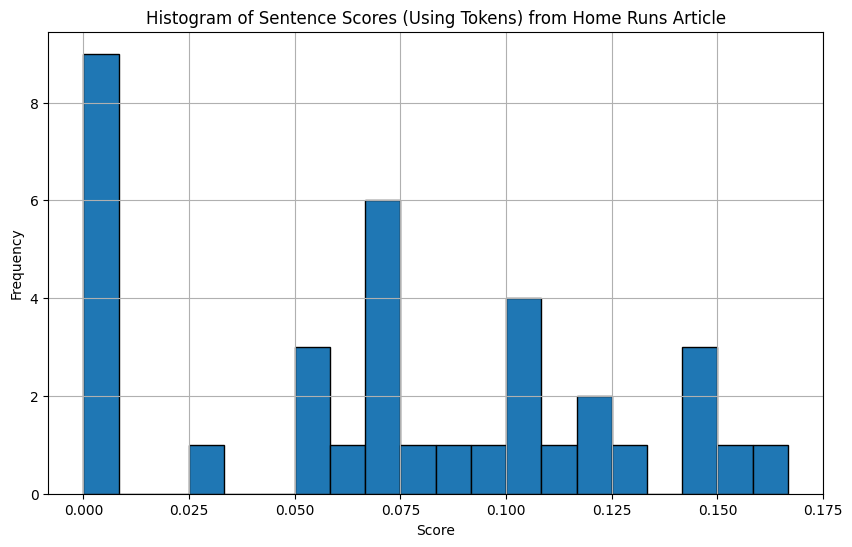

Token scores for each sentence: [0.10344827586206896, 0.06896551724137931, 0.14285714285714285, 0.06666666666666667, 0.06666666666666667, 0.0, 0.0, 0.0, 0.10526315789473684, 0.08108108108108109, 0.05263157894736842, 0.14634146341463414, 0.10204081632653061, 0.11764705882352941, 0.15384615384615385, 0.07142857142857142, 0.1111111111111111, 0.12121212121212122, 0.0, 0.05263157894736842, 0.0, 0.0, 0.13043478260869565, 0.16666666666666666, 0.08333333333333333, 0.09523809523809523, 0.058823529411764705, 0.14285714285714285, 0.07407407407407407, 0.0, 0.0, 0.0, 0.02564102564102564, 0.05555555555555555, 0.10526315789473684, 0.07407407407407407]


In [ ]:
# Initialize the spaCy pipeline
nlp = spacy.load("en_core_web_sm")

# Parse the HTML content
soup = BeautifulSoup(loaded_html, 'html.parser')

# Try to find the article body section
article_section = soup.find('div', {'class': 'grid-ten large-grid-nine grid-last content-body content entry-content instapaper_body inline-promos'})

# Extract the article text
article_text = article_section.get_text()

def score_sentence_by_token(sentence, interesting_tokens):
    # Process the sentence with spaCy to get a doc object
    doc = nlp(sentence)

    # Count the number of interesting tokens
    token_count = sum(1 for token in doc if token.text.lower() in interesting_tokens)

    # Calculate the score: interesting tokens divided by total tokens in sentence
    total_words = len([token for token in doc if not token.is_space and not token.is_punct])

    if total_words> 0:
        return token_count / total_words
    else:
        return 0
    
# Split the article text into sentences
doc = nlp(article_text)
sentences = list(doc.sents)

# Interesting tokens (from Q3)
interesting_tokens = ["home", "runs", "game", "baseball", "temperatures"]

# List to store scores of all sentences
token_scores = []

# Iterate over each sentence in the document and calculate token scores
for sentence in doc.sents:
    score = score_sentence_by_token(sentence.text, interesting_tokens)
    token_scores.append(score)

# Histogram of sentence scores
plt.figure(figsize=(10, 6))
plt.hist(token_scores, bins=20, edgecolor='black')
plt.title('Histogram of Sentence Scores (Using Tokens) from Home Runs Article')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

print(f"Token scores for each sentence: {token_scores}")

# The most common range of scores seems to be from 0.05 to 0.11

6. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

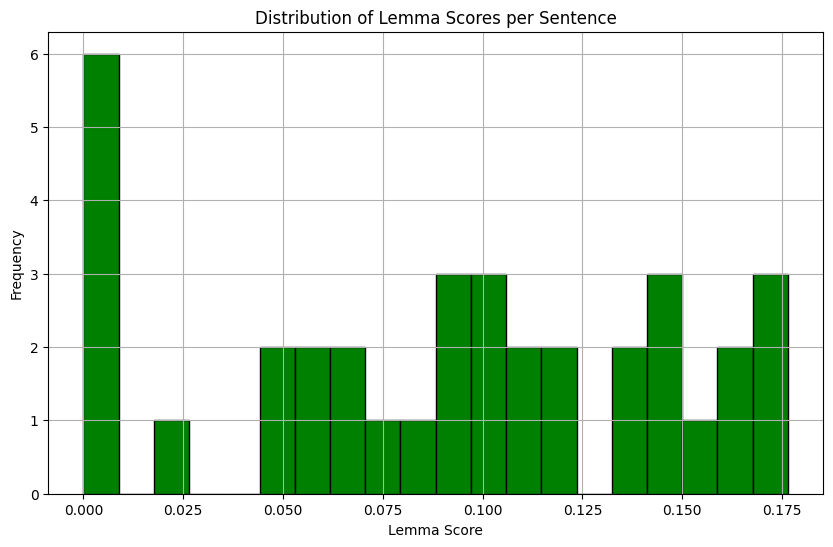

In [ ]:
# Initialize the spaCy pipeline
nlp = spacy.load("en_core_web_sm")

# Parse the HTML content
soup = BeautifulSoup(loaded_html, 'html.parser')

# Try to find the article body section
article_section = soup.find('div', {'class': 'grid-ten large-grid-nine grid-last content-body content entry-content instapaper_body inline-promos'})

# Extract the article text
article_text = article_section.get_text()

def score_sentence_by_lemma(sentence, interesting_lemmas):
    # Process the sentence with spaCy
    doc = nlp(sentence)

    # Count the number of interesting tokens
    lemma_count = sum(1 for token in doc if token.lemma_.lower() in interesting_lemmas)

    # Calculate the score: interesting lemmas divided by total tokens in sentence
    total_words = len([token for token in doc if not token.is_space and not token.is_punct])
    
    if total_words > 0: 
        return lemma_count / total_words
    else:
        return 0
    
# Load the article text
nlp = spacy.load("en_core_web_sm")
doc = nlp(article_text)

# Interesting lemmas (from Q4)
interesting_lemmas = ["run", "home", "game", "temperature", "baseball"]

# List to store lemma scores of each sentence
lemma_scores = []

# Iterate over each sentence in the document and calculate lemma scores
for sentence in doc.sents:
    score = score_sentence_by_lemma(sentence.text, interesting_lemmas)
    lemma_scores.append(score)

# Plot the histogram of lemma scores
plt.figure(figsize=(10, 6))
plt.hist(lemma_scores, bins=20, edgecolor='black', color='green')
plt.title("Distribution of Lemma Scores per Sentence")
plt.xlabel("Lemma Score")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# The most common range of scores seems to be from 0.045 to 0.122

## Question 7. 

Using the histograms from questions 5 and 6, decide a "cutoff" score for tokens and lemmas such that fewer than half the sentences would have a score greater than the cutoff score.  Record the scores in this Markdown cell

* Cutoff Score (tokens): 0.073
* Cutoff Score (lemmas): 0.099

Feel free to change these scores as you generate your summaries.  Ideally, we're shooting for at least 6 sentences for our summary, but don't want more than 10 (these numbers are rough estimates; they depend on the length of your article).

In [24]:
import numpy as np

# Use the median to crate the cutoffs
token_cutoff = np.median(token_scores)
lemma_cutoff = np.median(lemma_scores)

# Print the results
print(f"Cutoff score (tokens): {token_cutoff:.3f}")
print(f"Cutoff score (lemmas): {lemma_cutoff:.3f}")

Cutoff score (tokens): 0.073
Cutoff score (lemmas): 0.099


## Question 8. 

Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on tokens) is greater than the cutoff score you identified in question 7.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [32]:
# Initialize the spaCy pipeline
nlp = spacy.load("en_core_web_sm")

# Parse the HTML content
soup = BeautifulSoup(loaded_html, 'html.parser')

# Try to find the article body section
article_section = soup.find('div', {'class': 'grid-ten large-grid-nine grid-last content-body content entry-content instapaper_body inline-promos'})

# Extract the article text
article_text = article_section.get_text()

def score_sentence_by_token(sentence, interesting_tokens):
    # Process the sentence with spaCy to get a doc object
    doc = nlp(sentence)

    # Count the number of interesting tokens
    token_count = sum(1 for token in doc if token.text.lower() in interesting_tokens)

    # Calculate the score: interesting tokens divided by total tokens in sentence
    total_words = len([token for token in doc if not token.is_space and not token.is_punct])

    if total_words> 0:
        return token_count / total_words
    else:
        return 0
    
# Split the article text into sentences
doc = nlp(article_text)
sentences = list(doc.sents)

# Interesting tokens (from Q3)
interesting_tokens = ["home", "runs", "game", "baseball", "temperatures"]

# List to store scores of all sentences
token_scores = []

# Iterate over each sentence in the document and calculate token scores
for sentence in doc.sents:
    score = score_sentence_by_token(sentence.text, interesting_tokens)
    token_scores.append(score)

# Create an empty list to store sentences that exceed the cutoff score
summary_sentences = []

# Loop through each sentence in the article
for sent in doc.sents:
    # Get the polarity score for the sentence using TextBlob
    polarity = TextBlob(sent.text).sentiment.polarity

    # Check if the polarity score is greater than the cutoff score
    if polarity > token_cutoff:
        # Add the sentence text (stripped of extra whitespace) to the summary list
        summary_sentences.append(sent.text.strip())

# Generate the summary by joining the selected sentences with a space
summary_text = ' '.join(summary_sentences)

# Print the generated summary
print("Generated Summary:\n")
print(summary_text)

Generated Summary:

Home runs are exhilarating – those lofting moments when everyone looks skyward, baseball players and fans alike, anxiously awaiting the outcome: run or out, win or loss, elation or despair. What we learned from 100,000 baseball games
The physics tell a simple and compelling story: Warm air is less dense than cool air. As air heats up and molecules move faster, the air expands, leaving more space between molecules. As a result, a batted ball should fly farther on a warmer day than it would on a cooler day owing to less air resistance. But while scientists like Alan Nathan have shown that balls go farther in higher temperatures, no formal scientific investigation had been performed to prove that global warming is helping fuel baseball’s home run spree – until now. This means we can compare a ball coming off a bat at the same angle and velocity on a warm day and a cool day – near-perfect experimental conditions. The high-speed camera model nearly exactly replicated the

## Question 9. 

Print the polarity score of your summary you generated with the token scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [36]:
# Calculate the polarity of the summary
summary_blob = TextBlob(summary_text)
summary_polarity = summary_blob.sentiment.polarity

# Print the polarity score and the number of sentences in the summary
print(f"\nPolarity Score of the summary: {summary_polarity:.5f}")
print(f"Number of sentences in the summary: {len(summary_sentences)}")


Polarity Score of the summary: 0.23362
Number of sentences in the summary: 13


## Question 10. 

Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on lemmas) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [39]:
# Initialize the spaCy pipeline
nlp = spacy.load("en_core_web_sm")

# Parse the HTML content
soup = BeautifulSoup(loaded_html, 'html.parser')

# Try to find the article body section
article_section = soup.find('div', {'class': 'grid-ten large-grid-nine grid-last content-body content entry-content instapaper_body inline-promos'})

# Extract the article text
article_text = article_section.get_text()

def score_sentence_by_lemma(sentence, interesting_lemmas):
    # Process the sentence with spaCy
    doc = nlp(sentence)

    # Count the number of interesting tokens
    lemma_count = sum(1 for token in doc if token.lemma_.lower() in interesting_lemmas)

    # Calculate the score: interesting lemmas divided by total tokens in sentence
    total_words = len([token for token in doc if not token.is_space and not token.is_punct])
    
    if total_words > 0: 
        return lemma_count / total_words
    else:
        return 0
    
# Load the article text
nlp = spacy.load("en_core_web_sm")
doc = nlp(article_text)

# Interesting lemmas (from Q4)
interesting_lemmas = ["run", "home", "game", "temperature", "baseball"]

# List to store scores of all sentences
lemma_scores = []

# Iterate over each sentence in the document and calculate token scores
for sentence in doc.sents:
    score = score_sentence_by_lemma(sentence.text, interesting_lemmas)
    lemma_scores.append(score)

# Create an empty list to store sentences that exceed the cutoff score
summary_sentences = []

# Loop through each sentence in the article
for sent in doc.sents:
    # Get the polarity score for the sentence using TextBlob
    polarity = TextBlob(sent.text).sentiment.polarity

    # Check if the polarity score is greater than the cutoff score
    if polarity > lemma_cutoff:
        # Add the sentence text (stripped of extra whitespace) to the summary list
        summary_sentences.append(sent.text.strip())

# Generate the summary by joining the selected sentences with a space
summary_text1 = ' '.join(summary_sentences)

# Print the generated summary
print("Generated Summary:\n")
print(summary_text1)

Generated Summary:

Home runs are exhilarating – those lofting moments when everyone looks skyward, baseball players and fans alike, anxiously awaiting the outcome: run or out, win or loss, elation or despair. What we learned from 100,000 baseball games
The physics tell a simple and compelling story: Warm air is less dense than cool air. As air heats up and molecules move faster, the air expands, leaving more space between molecules. As a result, a batted ball should fly farther on a warmer day than it would on a cooler day owing to less air resistance. But while scientists like Alan Nathan have shown that balls go farther in higher temperatures, no formal scientific investigation had been performed to prove that global warming is helping fuel baseball’s home run spree – until now. This means we can compare a ball coming off a bat at the same angle and velocity on a warm day and a cool day – near-perfect experimental conditions. The high-speed camera model nearly exactly replicated the

11. Print the polarity score of your summary you generated with the lemma scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [40]:
# Calculate the polarity of the summary
summary_blob = TextBlob(summary_text1)
summary_polarity = summary_blob.sentiment.polarity

# Print the polarity score and the number of sentences in the summary
print(f"\nPolarity Score of the summary: {summary_polarity:.5f}")
print(f"Number of sentences in the summary: {len(summary_sentences)}")


Polarity Score of the summary: 0.24293
Number of sentences in the summary: 12


12.  Compare your polarity scores of your summaries to the polarity scores of the initial article.  Is there a difference?  Why do you think that may or may not be?.  Answer in this Markdown cell.

The initial polarity score is much lower than the polarity scores of the summaries. I think that part of this is due to the selecting of above the cutoff, and also in part due to quite a few sentences being cut out. These sentences that are cut out must have more negative or neutral connotations behind their words.

13. Based on your reading of the original article, which summary do you think is better (if there's a difference).  Why do you think this might be?

I don't think there is much of a difference at all. I think this is due to the fact that there is only a 1 sentence difference in the two summaries. I was not a big fan of either summary, as they both seemed to leave out a lot of key points in this short article. 